In [1]:
%run "part01_preprocessing.ipynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Content   
   
**Data Preparation**
- Lidando com Outliers - Isolation Forest
- Normalização
- Padronização
- Redução de Dimensionalidade 
 - PCA
 - UMAP
 - t-SNE

**Machine Learning**
- Kmeans
- Hieracical Cluster
- Gausian Mistured Model

**Conclusão**

# Data Preparation

## Lidando com Outliers - Isolation Forest

In [2]:
data_noutliers = data_new.copy()

In [3]:
# Arbitariamente assumindo que 0.01% do dataset são outliers o que corresponde aproximadamente no máximo 90 amostras
isfo = IsolationForest(contamination=0.01, random_state = RANDOM_SEED)#, max_samples = 100, )
isfo.fit(data_noutliers[numerical_features])

C:\Users\Alysson\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.01, random_state=42)

In [4]:
data_noutliers['anomaly_score'] =  isfo.decision_function(data_noutliers[numerical_features])
data_noutliers['anomaly'] = isfo.predict(data_noutliers[numerical_features])

In [5]:
print("Number of rows with outliers:", data_noutliers[data_noutliers['anomaly'] == -1].shape[0])
print("Number of rows without outliers", data_noutliers[data_noutliers['anomaly'] == 1].shape[0])
print("Number of original rows:", data_new.shape[0])

Number of rows with outliers: 90
Number of rows without outliers 8860
Number of original rows: 8950


In [6]:
data_noutliers['anomaly'].value_counts(normalize=True)

 1    0.989944
-1    0.010056
Name: anomaly, dtype: float64

In [7]:
# palette = ['#ff7f0e','#1f77b4']
# sns.pairplot(data_noutliers, vars=numerical_features, hue='anomaly', palette=palette)

In [8]:
data_prep = data_noutliers.loc[data_noutliers['anomaly']==1]

In [9]:
data_prep = data_prep.drop(columns=['anomaly','anomaly_score'], axis=1)

In [10]:
data_prep

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE       PROFIT
0     C10001    40.900749           0.818182      95.40              0.00                   95.40      0.000000             0.166667                    0.000000                          0.083333                0.000000               0.0            2.0        1000.0   201.802084        139.509787          0.000000    12.0   106.402084
1     C10002  3202.467416           0.909091       0.00              0.00                    0.00   6442.945483             0.000000                    0.000000                          0.000000                0.250000               4.0            0.0        7000.0  4103.032597       1072.340217          0.222222    12.0  4103.032597
2     C10003  2495.148862           1.000000     773.17            773.17                    0.00      0.000000             1.000000                    1.000000                          0.000000                0.000000               0.0           12.0        7500.0   622.066742        627.284787          0.000000    12.0  -151.103258
3     C10004  1666.670542           0.636364    1499.00           1499.00                    0.00    205.788017             0.083333                    0.083333                          0.000000                0.083333               1.0            1.0        7500.0     0.000000        379.829982          0.000000    12.0 -1499.000000
4     C10005   817.714335           1.000000      16.00             16.00                    0.00      0.000000             0.083333                    0.083333                          0.000000                0.000000               0.0            1.0        1200.0   678.334763        244.791237          0.000000    12.0   662.334763
...      ...          ...                ...        ...               ...                     ...           ...                  ...                         ...                               ...                     ...               ...            ...           ...          ...               ...               ...     ...          ...
8945  C19186    28.493517           1.000000     291.12              0.00                  291.12      0.000000             1.000000                    0.000000                          0.833333                0.000000               0.0            6.0        1000.0   325.594462         48.886365          0.500000     6.0    34.474462
8946  C19187    19.183215           1.000000     300.00              0.00                  300.00      0.000000             1.000000                    0.000000                          0.833333                0.000000               0.0            6.0        1000.0   275.861322        156.060050          0.000000     6.0   -24.138678
8947  C19188    23.398673           0.833333     144.40              0.00                  144.40      0.000000             0.833333                    0.000000                          0.666667                0.000000               0.0            5.0        1000.0    81.270775         82.418369          0.250000     6.0   -63.129225
8948  C19189    13.457564           0.833333       0.00              0.00                    0.00     36.558778             0.000000                    0.000000                          0.000000                0.166667               2.0            0.0         500.0    52.549959         55.755628          0.250000     6.0    52.549959
8949  C19190   372.708075           0.666667    1093.25           1093.25                    0.00    127.040008             0.666667                    0.666667                          0.000000                0.333333               2.0           23.0        1200.0    63.165404         88.288956          0.0

## Normalização

In [11]:
#data_prep=data_new.copy() Testing without isolation forest

In [12]:
log_columns = data_prep.drop('PROFIT',axis=1).skew().sort_values(ascending=False) #PROFIT possui zeros não podemos aplicar log
log_columns = log_columns.loc[log_columns > 0.75]
log_columns

MINIMUM_PAYMENTS              14.379889
INSTALLMENTS_PURCHASES         6.513429
CASH_ADVANCE_TRX               5.585919
PAYMENTS                       4.784280
ONEOFF_PURCHASES               4.046439
PURCHASES_TRX                  3.990547
CASH_ADVANCE                   3.885995
PURCHASES                      3.402333
BALANCE                        2.260337
PRC_FULL_PAYMENT               1.962302
CASH_ADVANCE_FREQUENCY         1.824329
ONEOFF_PURCHASES_FREQUENCY     1.575175
CREDIT_LIMIT                   1.469088
dtype: float64

In [13]:
for col in log_columns.index:
    data_prep[col] = np.log1p(data_prep[col])

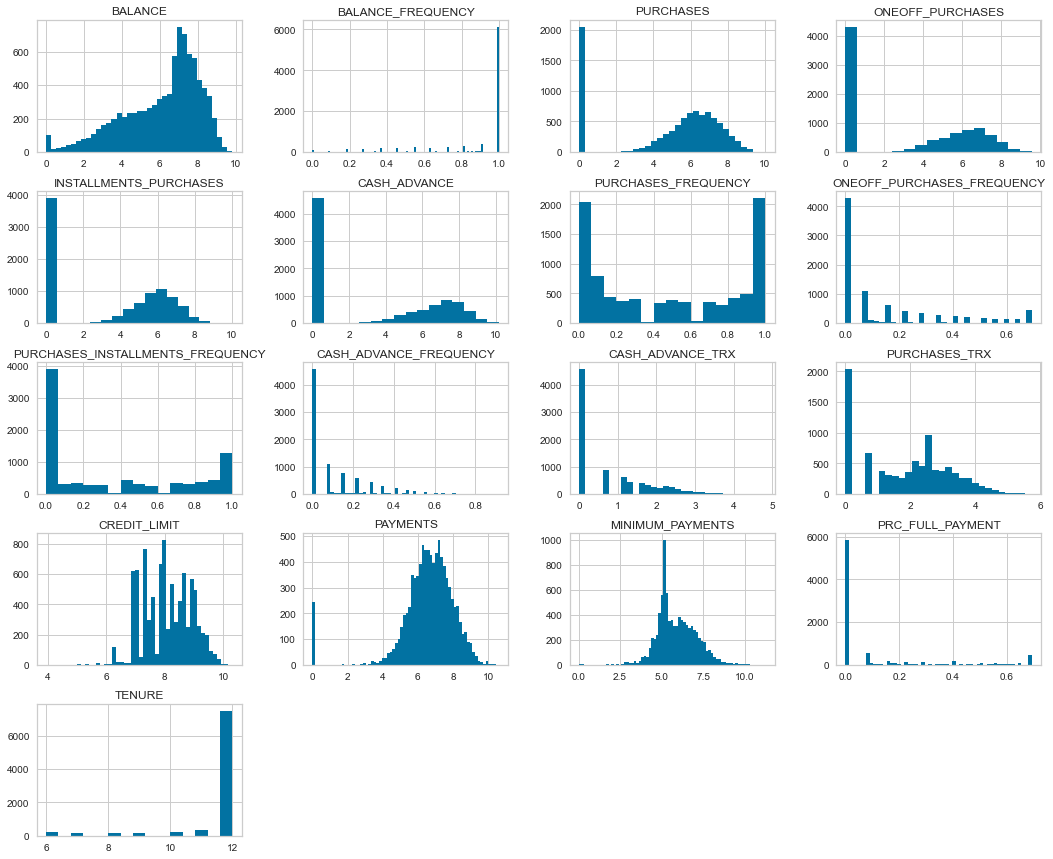

In [14]:
data_prep[numerical_features].hist(figsize=(18,15), bins='auto');

## Padronização

In [15]:
mms = MinMaxScaler()

for col in data_prep[numerical_features]:
    data_prep[col] = mms.fit_transform(data_prep[[col]]).squeeze()

In [16]:
data_prep.head()

CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE       PROFIT
0  C10001  0.380170           0.818182   0.455879          0.000000                0.455879      0.000000             0.166667                    0.000000                          0.083333                0.000000          0.000000       0.191510      0.466811  0.500576          0.438874          0.000000     1.0   106.402084
1  C10002  0.821548           0.909091   0.000000          0.000000                0.000000      0.861905             0.000000                    0.000000                          0.000000                0.243529          0.333889       0.000000      0.771814  0.783975          0.620013          0.289506     1.0  4103.032597
2  C10003  0.796156           1.000000   0.663764          0.695640                0.000000      0.000000             1.000000                    1.000000                          0.000000                0.000000          0.000000       0.447122      0.782631  0.606343          0.572303          0.000000     1.0  -151.103258
3  C10004  0.755107           0.636364   0.729767          0.764811                0.000000      0.523939             0.083333                    0.115477                          0.000000                0.087355          0.143798       0.120830      0.782631  0.000000          0.527702          0.000000     1.0 -1499.000000
4  C10005  0.682698           1.000000   0.282719          0.296295                0.000000      0.000000             0.083333                    0.115477                          0.000000                0.000000          0.000000       0.120830      0.495375  0.614491          0.488693          0.000000     1.0   662.334763

## Redução de Dimensionalidade - PCA

In [17]:
# Checking All components first
pca = PCA(n_components=data_prep[numerical_features].shape[1], random_state=RANDOM_SEED)
components = pca.fit_transform(data_prep[numerical_features])
components.shape

(8860, 17)

In [18]:
data_prep.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
PROFIT                              0
dtype: int64

In [19]:
nfeatures = range(pca.n_components_)
nfeatures

range(0, 17)

In [20]:
pca.explained_variance_ratio_

array([0.45885617, 0.16337499, 0.13382215, 0.06430319, 0.04755228,
       0.03714879, 0.02437233, 0.01499395, 0.01151517, 0.01056119,
       0.00945589, 0.00869105, 0.00686395, 0.00296263, 0.00218091,
       0.00202973, 0.00131562])

In [21]:
data_prep[numerical_features].var().sort_values(ascending=False)

PURCHASES_FREQUENCY                 0.160548
PURCHASES_INSTALLMENTS_FREQUENCY    0.156889
CASH_ADVANCE                        0.122102
ONEOFF_PURCHASES                    0.113047
ONEOFF_PURCHASES_FREQUENCY          0.095014
INSTALLMENTS_PURCHASES              0.093458
PRC_FULL_PAYMENT                    0.092250
PURCHASES                           0.083611
BALANCE_FREQUENCY                   0.056488
PURCHASES_TRX                       0.055729
TENURE                              0.049965
CASH_ADVANCE_TRX                    0.043074
BALANCE                             0.041811
CASH_ADVANCE_FREQUENCY              0.028662
PAYMENTS                            0.021889
CREDIT_LIMIT                        0.016223
MINIMUM_PAYMENTS                    0.011119
dtype: float64

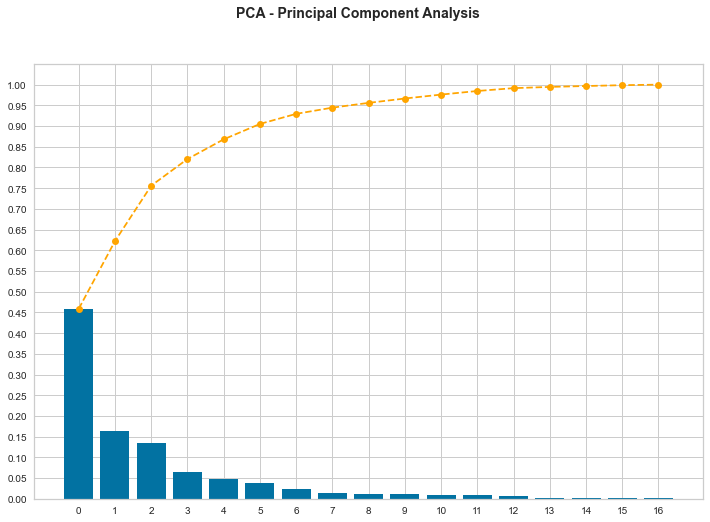

In [22]:
plt.figure(figsize=(12,8))
plt.suptitle('PCA - Principal Component Analysis', fontsize=14, fontweight='bold')
plt.bar(nfeatures, pca.explained_variance_ratio_)
plt.plot(nfeatures, pca.explained_variance_ratio_.cumsum(),color='orange', linestyle='--',marker='o' )
#plt.axhline(.95)
plt.yticks(np.arange(0,1.05,0.05))
plt.xticks(np.arange(0,pca.n_components_,1))
plt.show()

In [23]:
# With 9 components we have 96% of variance explanation
pca = PCA(9, random_state=RANDOM_SEED)
components = pca.fit_transform(data_prep[numerical_features])

In [24]:
components.shape

(8860, 9)

## Redução de Dimensionalidade -  UMAP

In [25]:
clusters = data_prep.copy()

In [26]:
# Dimensionality Reduction(to 2D) using technique UMAP 
umap = UMAP(random_state=RANDOM_SEED)
umap_embedding = umap.fit_transform(components)

# X,y axis representation for UMAP
clusters['umap_x'] = umap_embedding[:,0]
clusters['umap_y'] = umap_embedding[:,1]

In [27]:
plt.figure(figsize=(7,4))
plt.title('UMAP', fontsize='14',fontweight='bold')
sns.scatterplot(data=clusters, x='umap_x', y='umap_y');

## Redução de Dimensionalidade -  t-SNE

In [28]:
# Dimensionality Reduction(to 2D) using technique TSNE
tsne = TSNE(n_components=2, init='pca', learning_rate='auto', n_jobs=-1, random_state=RANDOM_SEED)
tsne_embedding = tsne.fit_transform(components)

# X,y axis representation using TSNE
clusters['tsne_x'] = tsne_embedding[:,0]
clusters['tsne_y'] = tsne_embedding[:,1]

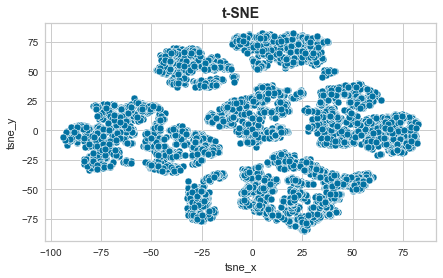

In [29]:
plt.figure(figsize=(7,4))
plt.title('t-SNE', fontsize='14',fontweight='bold')
sns.scatterplot(data=clusters, x='tsne_x', y='tsne_y');

In [30]:
# Setting 2D plot parameters for Plotly
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))

def plot_graph2D(x,y, cluster, title):    
    name=cluster.name
    #data=data.sort_values(by=cluster.name, ascending=True)
    cluster=cluster.astype(str)
    
    fig = px.scatter(#data, 
                     x=x, 
                     y=y, 
                     color=cluster, 
                     color_discrete_sequence=px.colors.qualitative.Prism
                    )

    fig.update_traces(marker=dict(size=11, 
                              opacity=0.75, 
                              line=dict(width=1, color='#F7F7F7')))

    fig.update_layout(template=temp, 
                  title=title, 
                  width=700, 
                  legend_title='Clusters',                  
                  xaxis=dict(title='x', showline=True, zeroline=False), 
                  yaxis=dict(title='y',showline=True, zeroline=False))
    
    
    fig.show()

# Machine Learning

## KMEANS

In [31]:
# Finding best K param to Kmeans, using WCSS and Silhouette Score as metrics
kmeans_scores_list = []

for k in range(2,10):
    tunning_kmeans = KMeans(n_clusters=k, random_state=RANDOM_SEED)# init="k-means++",
    # We need to test which space (PCA, UMAP, t-SNE) performs best according to WCSS and Silhouette Score metrics
    # component, umap_embedding, tsne_embedding
    # Thus, the space embedding that presented the best results was the UMAP.
    tunning_kmeans_labels = tunning_kmeans.fit_predict(umap_embedding)
    
    ss = silhouette_score(umap_embedding, tunning_kmeans_labels, metric='euclidean')
    
    dbs = davies_bouldin_score(umap_embedding, tunning_kmeans_labels)
    
    kmeans_scores_list.append(pd.Series({'Clusters': k,
                                    'WCSS': tunning_kmeans.inertia_,
                                    'SS': ss,
                                    'Davies Bouldin Score': dbs}))

In [32]:
kmeans_scores_table = (pd.concat(kmeans_scores_list, axis=1).T[['Clusters','WCSS','SS','Davies Bouldin Score']].set_index('Clusters'))
kmeans_scores_table

WCSS        SS  Davies Bouldin Score
Clusters                                               
2.0       578246.125000  0.447199              1.101118
3.0       272447.312500  0.561689              0.601159
4.0       144420.687500  0.622602              0.615760
5.0        91665.250000  0.664558              0.455569
6.0        54388.078125  0.691296              0.411947
7.0        35559.558594  0.728209              0.340273
8.0        27198.050781  0.695523              0.445715
9.0        23177.443359  0.632257              0.591872

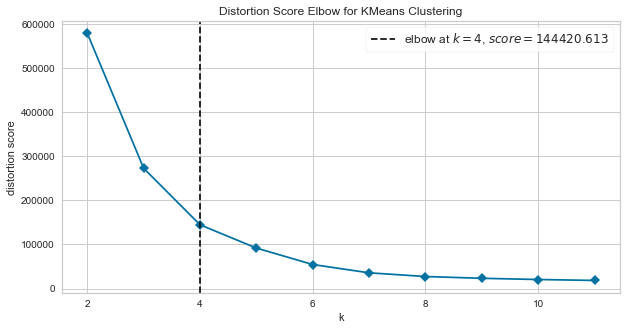

In [33]:
plt.figure(figsize=(10,5))
elbow = KElbowVisualizer(tunning_kmeans, k=(2,12), timings = False)
elbow.fit(umap_embedding)
elbow.show();

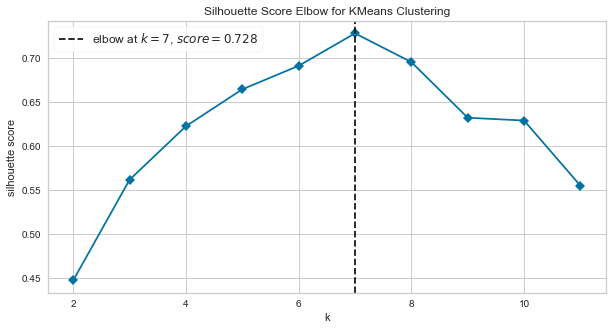

In [34]:
plt.figure(figsize=(10,5))
ss = KElbowVisualizer(tunning_kmeans, k=(2,12), metric = 'silhouette', timings = False)
ss.fit(umap_embedding)
ss.show();

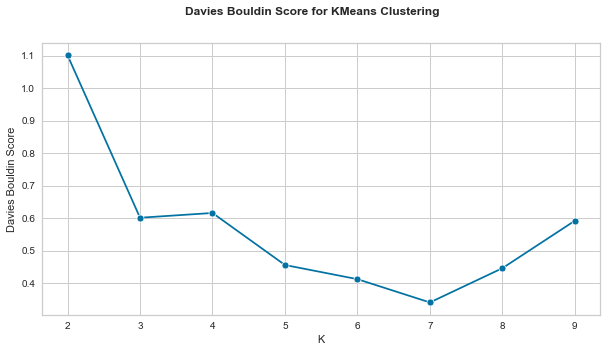

In [35]:
plt.figure(figsize=(10,5))
plt.suptitle('Davies Bouldin Score for KMeans Clustering', fontsize=12, fontweight='bold')
sns.lineplot(x=kmeans_scores_table.index, y=kmeans_scores_table['Davies Bouldin Score'], marker='o')
plt.xlabel('K');
plt.ylabel('Davies Bouldin Score');

In [36]:
# Using the best k find to our purpouse
k=7
kmeans = KMeans( n_clusters=k, random_state=RANDOM_SEED)#init = "k-means++",
kmeans_labels = kmeans.fit_predict(umap_embedding)
clusters['KMeans'] = kmeans_labels

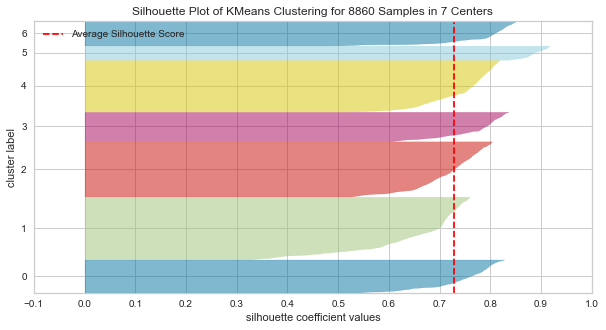

In [37]:
plt.figure(figsize=(10,5))
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(umap_embedding)
visualizer.finalize()

In [38]:
clusters.sort_values(by='KMeans')
plot_graph2D(clusters['umap_x'],
             clusters['umap_y'],
             clusters['KMeans'],
             title='KMeans Cluster using UMAP')

In [39]:
# plot_graph2D(clusters['tsne_x'],
#              clusters['tsne_y'],
#              clusters['KMeans-Cluster'],
#              title='KMeans Cluster using t-SNE')

## Hierarchical Clustering

In [40]:
hc_scores_list = []

for k in range(2,11):
    tunning_hc = hierarchy.linkage(umap_embedding, 'ward', metric='euclidean')# init="k-means++",
    
    # We need to test which space (PCA, UMAP, t-SNE) performs best according to WCSS and Silhouette Score metrics
    # component, umap_embedding, tsne_embedding
    # Thus, the space embedding that presented the best results was the UMAP.
    tunning_hc_labels = hierarchy.fcluster(tunning_hc, k, criterion='maxclust')
    
    ss = silhouette_score(umap_embedding, tunning_hc_labels, metric='euclidean')
    
    dbs = davies_bouldin_score(umap_embedding, tunning_hc_labels)
    
    hc_scores_list.append(pd.Series({'Clusters': k,
                                    'SS': ss,
                                    'Davies Bouldin Score': dbs}))

In [41]:
hc_scores_table = (pd.concat(hc_scores_list, axis=1).T[['Clusters','SS','Davies Bouldin Score']].set_index('Clusters'))

In [42]:
hc_scores_table

SS  Davies Bouldin Score
Clusters                                
2.0       0.447199              1.101118
3.0       0.561848              0.601454
4.0       0.622961              0.615545
5.0       0.664941              0.455822
6.0       0.691296              0.411947
7.0       0.728209              0.340273
8.0       0.695526              0.445791
9.0       0.628170              0.605552
10.0      0.621952              0.601081

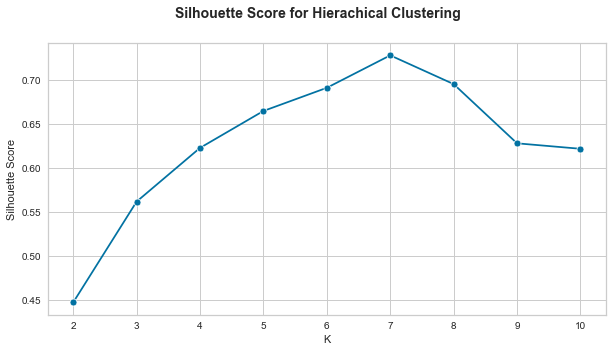

In [43]:
plt.figure(figsize=(10,5))
plt.suptitle('Silhouette Score for Hierachical Clustering', fontsize=14, fontweight='bold')
sns.lineplot(x=hc_scores_table.index, y=hc_scores_table['SS'], marker='o')
plt.xlabel('K');
plt.ylabel('Silhouette Score');

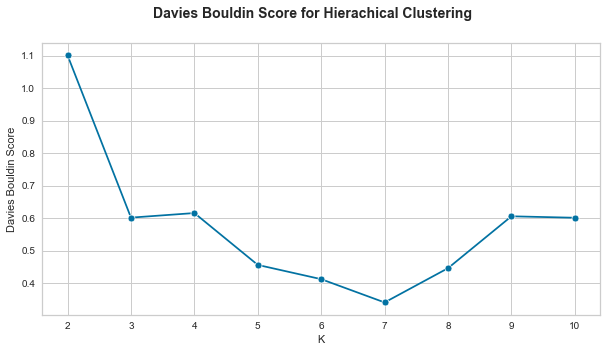

In [44]:
plt.figure(figsize=(10,5))
plt.suptitle('Davies Bouldin Score for Hierachical Clustering', fontsize=14, fontweight='bold')
sns.lineplot(x=hc_scores_table.index, y=hc_scores_table['Davies Bouldin Score'], marker='o')
plt.xlabel('K');
plt.ylabel('Davies Bouldin Score');

C:\Users\Alysson\AppData\Local\Temp/ipykernel_9576/1047813183.py:20: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



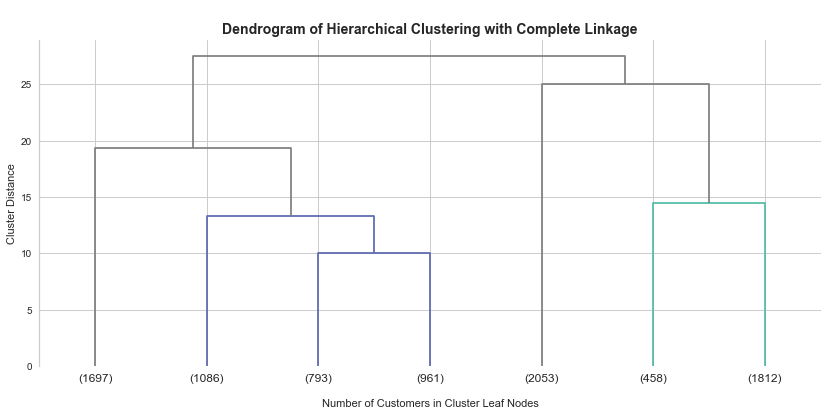

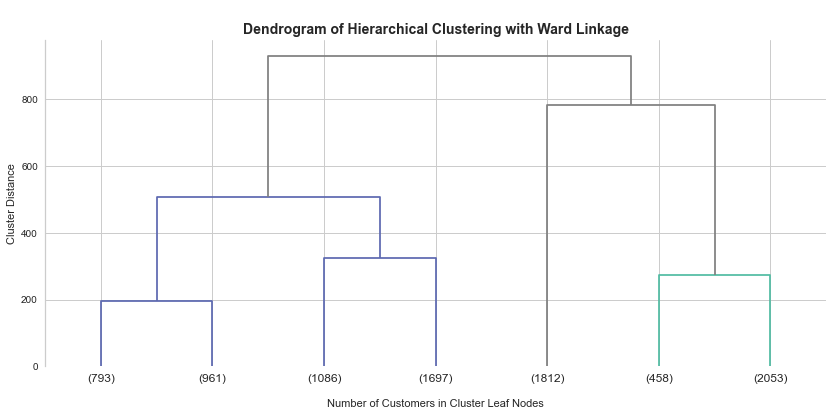

In [45]:
methods=['complete','ward']

for i in methods:
    Z = hierarchy.linkage(umap_embedding, method=i, metric='euclidean')
    hierarchy.set_link_color_palette(['#5d69b1', '#52bca3', '#99c945'])

    fig, ax = plt.subplots(figsize=(14,6))
    den=hierarchy.dendrogram(Z, 
                             p=7, 
                             truncate_mode='lastp',
                             show_leaf_counts=True, 
                             ax=ax,
                             above_threshold_color='grey') #orientation='top', #color_threshold=100,
    
    #ax.axhline(10, color='grey', linestyle='--')
    ax.set_title(f'\nDendrogram of Hierarchical Clustering with {i.capitalize()} Linkage', fontweight='bold', fontsize='14')
    ax.set_xlabel('\nNumber of Customers in Cluster Leaf Nodes')
    ax.set_ylabel('Cluster Distance')
    ax.spines['right'].set_visible(False), ax.spines['top'].set_visible(False), ax.spines['bottom'].set_visible(False)
    fig.show()

In [46]:
k=7
#hc = AgglomerativeClustering(k, affinity='euclidean', linkage='complete', compute_full_tree=False)
hc = hierarchy.linkage(umap_embedding, 'ward', metric='euclidean')
hc_labels = hierarchy.fcluster(hc, k, criterion='maxclust')
clusters["HierarchicalCluster"]=hc_labels

In [47]:
plot_graph2D(clusters['umap_x'],
             clusters['umap_y'],
             clusters['HierarchicalCluster'],
             title='Hierarchical Cluster using UMAP')

## Gausian Mistured Model

In [48]:
# Finding best K param to GMM, AIC and BIC as metrics
gmm_scores_list = []

for k in range(2,13):
    tunning_gmm = GaussianMixture(n_components=k, random_state=RANDOM_SEED)#n_init=5, init_params='k-means++', 
    tunning_gmm_labels = tunning_gmm.fit_predict(umap_embedding)
    
    
    ss = silhouette_score(umap_embedding, tunning_gmm_labels, metric='euclidean')
    dbs = davies_bouldin_score(umap_embedding, tunning_gmm_labels)
    
    gmm_scores_list.append(pd.Series({'Clusters': k,
                                    'AIC': tunning_gmm.aic(umap_embedding),
                                    'BIC': tunning_gmm.bic(umap_embedding),
                                    'SS': ss,
                                    'Davies Bouldin Score': dbs}))
    
gmm_scores_table = (pd.concat(gmm_scores_list, axis=1).T[['Clusters','AIC','BIC','SS','Davies Bouldin Score']]).set_index('Clusters')

In [49]:
gmm_scores_table

AIC            BIC        SS  Davies Bouldin Score
Clusters                                                              
2.0       117641.201564  117719.183887  0.360309              0.966000
3.0       108394.880440  108515.398574  0.561848              0.601454
4.0        99867.882422  100030.936369  0.622961              0.615545
5.0        96416.373851   96621.963611  0.664941              0.455822
6.0        93052.898616   93301.024187  0.691296              0.411947
7.0        90921.809545   91212.470928  0.728209              0.340273
8.0        90468.547371   90801.744567  0.650997              0.578235
9.0        89953.111717   90328.844726  0.670306              0.487626
10.0       88529.321926   88947.590747  0.636852              0.554841
11.0       87899.867327   88360.671959  0.560762              0.624153
12.0       87627.004046   88130.344491  0.554515              0.611682

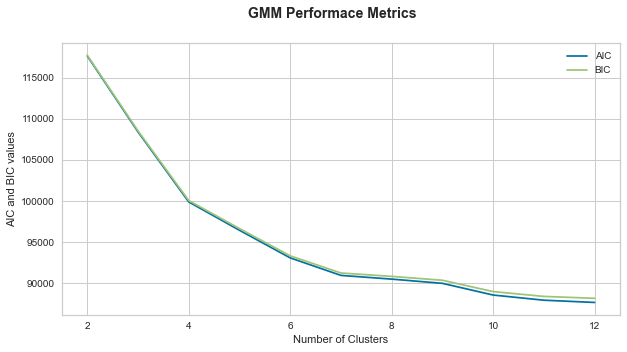

In [50]:
plt.figure(figsize=(10,5))
plt.suptitle('GMM Performace Metrics', fontsize=14, fontweight='bold')
sns.lineplot(x=gmm_scores_table.index, y=gmm_scores_table.AIC, label='AIC')
sns.lineplot(x=gmm_scores_table.index, y=gmm_scores_table.BIC, label='BIC')
plt.ylabel('AIC and BIC values')
plt.xlabel('Number of Clusters')
plt.legend(loc='best');

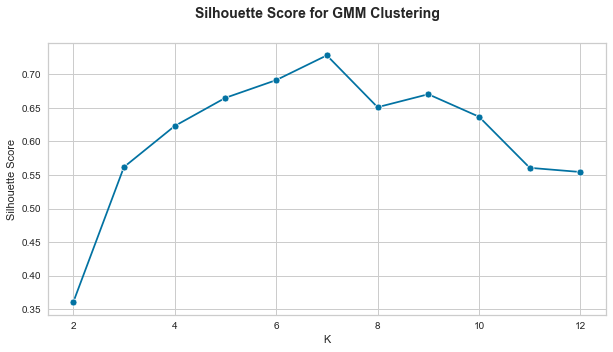

In [51]:
plt.figure(figsize=(10,5))
plt.suptitle('Silhouette Score for GMM Clustering', fontsize=14, fontweight='bold')
sns.lineplot(x=gmm_scores_table.index, y=gmm_scores_table['SS'], marker='o')
plt.xlabel('K');
plt.ylabel('Silhouette Score');

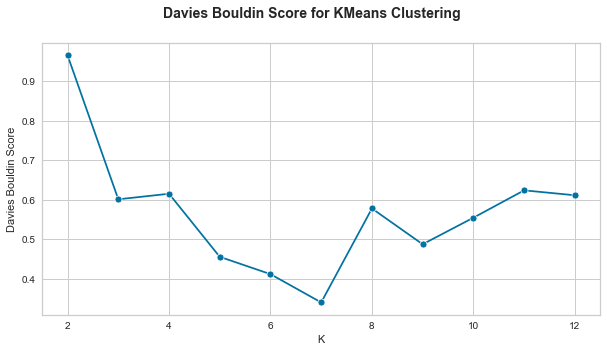

In [52]:
plt.figure(figsize=(10,5))
plt.suptitle('Davies Bouldin Score for KMeans Clustering', fontsize=14, fontweight='bold')
sns.lineplot(x=gmm_scores_table.index, y=gmm_scores_table['Davies Bouldin Score'], marker='o')
plt.xlabel('K');
plt.ylabel('Davies Bouldin Score');

In [53]:
k=7
gmm = GaussianMixture(n_components=k, random_state=RANDOM_SEED)#n_init=5, init_params='k-means++',
gmm_labels = gmm.fit_predict(umap_embedding)
clusters['GMM'] = gmm_labels

In [66]:
plot_graph2D(clusters['umap_x'],
             clusters['umap_y'],
             clusters['GMM'],
             title='GMM Cluster using UMAP')

## Best Model

In [55]:
cluster_results = clusters.copy()

In [56]:
cluster_results = pd.concat([clusters[['GMM']], data_new],axis=1)
cluster_results

GMM CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE       PROFIT
0     2.0  C10001    40.900749           0.818182      95.40              0.00                   95.40      0.000000             0.166667                    0.000000                          0.083333                0.000000               0.0            2.0        1000.0   201.802084        139.509787          0.000000    12.0   106.402084
1     1.0  C10002  3202.467416           0.909091       0.00              0.00                    0.00   6442.945483             0.000000                    0.000000                          0.000000                0.250000               4.0            0.0        7000.0  4103.032597       1072.340217          0.222222    12.0  4103.032597
2     0.0  C10003  2495.148862           1.000000     773.17            773.17                    0.00      0.000000             1.000000                    1.000000                          0.000000                0.000000               0.0           12.0        7500.0   622.066742        627.284787          0.000000    12.0  -151.103258
3     6.0  C10004  1666.670542           0.636364    1499.00           1499.00                    0.00    205.788017             0.083333                    0.083333                          0.000000                0.083333               1.0            1.0        7500.0     0.000000        379.829982          0.000000    12.0 -1499.000000
4     0.0  C10005   817.714335           1.000000      16.00             16.00                    0.00      0.000000             0.083333                    0.083333                          0.000000                0.000000               0.0            1.0        1200.0   678.334763        244.791237          0.000000    12.0   662.334763
...   ...     ...          ...                ...        ...               ...                     ...           ...                  ...                         ...                               ...                     ...               ...            ...           ...          ...               ...               ...     ...          ...
8945  2.0  C19186    28.493517           1.000000     291.12              0.00                  291.12      0.000000             1.000000                    0.000000                          0.833333                0.000000               0.0            6.0        1000.0   325.594462         48.886365          0.500000     6.0    34.474462
8946  2.0  C19187    19.183215           1.000000     300.00              0.00                  300.00      0.000000             1.000000                    0.000000                          0.833333                0.000000               0.0            6.0        1000.0   275.861322        156.060050          0.000000     6.0   -24.138678
8947  2.0  C19188    23.398673           0.833333     144.40              0.00                  144.40      0.000000             0.833333                    0.000000                          0.666667                0.000000               0.0            5.0        1000.0    81.270775         82.418369          0.250000     6.0   -63.129225
8948  1.0  C19189    13.457564           0.833333       0.00              0.00                    0.00     36.558778             0.000000                    0.000000                          0.000000                0.166667               2.0            0.0         500.0    52.549959         55.755628          0.250000     6.0    52.549959
8949  6.0  C19190   372.708075           0.666667    1093.25           1093.25                    0.00    127.040008             0.666667                    0.666667                          0.000000                0.333333               2.0           23.

In [57]:
def display_stats(sumary):   
    
    '''Tabela Resumo Estilizada'''    
    
    sumary=sumary.describe().T
    
    
    cm = sns.light_palette("#A2A2A2", as_cmap = True)
    display(sumary.style.format('{:.2f}').background_gradient(subset=(sumary.index[1:],sumary.columns[:]),cmap=cm))

In [58]:
display_stats(cluster_results)

In [59]:
aux1=cluster_results.groupby('GMM').mean().reset_index()
aux2=cluster_results[['PURCHASES_FREQUENCY','GMM']].groupby('GMM').count().rename(columns={'PURCHASES_FREQUENCY': 'COUNT'}).reset_index()
cluster_results_mean = aux2.merge(aux1, how='left', on='GMM').set_index('GMM').T

In [60]:
cm = sns.light_palette("#A2A2A2", as_cmap = True)

cluster_results_mean=cluster_results_mean.style.background_gradient(cmap = cm, axis = 1)\
    .set_precision(2)\
    .highlight_min(axis = 1, color = "#FF6347")\
    .highlight_max(axis = 1, color = "#2F4F4F")

cluster_results_mean

In [61]:
aux1=cluster_results.groupby('GMM').std().reset_index()
aux2=cluster_results[['PURCHASES_FREQUENCY','GMM']].groupby('GMM').count().rename(columns={'PURCHASES_FREQUENCY': 'COUNT'}).reset_index()
cluster_results_sum = aux2.merge(aux1, how='left', on='GMM').set_index('GMM').T
cluster_results_sum

GMM                                       0.0          1.0          2.0          3.0          4.0          5.0          6.0
COUNT                             1086.000000  2053.000000  1812.000000   961.000000  1697.000000   458.000000   793.000000
BALANCE                           1175.005950  2100.891987   895.344778  2360.827644  1643.446445  2486.051665  2241.960995
BALANCE_FREQUENCY                    0.304843     0.233388     0.302048     0.081630     0.153275     0.121182     0.163762
PURCHASES                         1207.522735     0.748158   819.465197  1549.179158  1949.228770   528.944740   957.687330
ONEOFF_PURCHASES                  1207.770337     0.730921     3.267791  1213.756624  1469.167813     0.066013   957.244495
INSTALLMENTS_PURCHASES               6.350774     1.550119   821.702725   738.734705  1007.623120   528.852520    15.244729
CASH_ADVANCE                         9.769690  2427.265658     3.978498  2191.855008     7.235948  2447.058517  2355.314478
PURCHASES_FREQUENCY                  0.312168     0.007609     0.306804     0.245707     0.235099     0.313249     0.251574
ONEOFF_PURCHASES_FREQUENCY           0.312597     0.006666     0.009323     0.284279     0.329606     0.010273     0.251468
PURCHASES_INSTALLMENTS_FREQUENCY     0.014224     0.005515     0.309753     0.306881     0.310462     0.314183     0.019292
CASH_ADVANCE_FREQUENCY               0.007110     0.200452     0.001958     0.202744     0.004168     0.195250     0.212101
CASH_ADVANCE_TRX                     0.090848     8.051053     0.023492     8.333982     0.042021     8.792636     7.635039
PURCHASES_TRX                       11.478803     0.098417    11.337676    25.497041    31.075237    11.652457    13.333705
CREDIT_LIMIT                      3596.095275  3249.811805  2693.466243  3910.941467  3776.069542  3520.761945  3464.899517
PAYMENTS                          1747.359643  2684.821195  1281.258718  2675.290336  1905.869831  3014.590925  2179.652594
MINIMUM_PAYMENTS                  1606.572335  2568.989567  3251.018060  1494.665906  1462.592824  2472.199789  1668.456204
PRC_FULL_PAYMENT                     0.296926     0.139895     0.368740     0.163277     0.353507     0.128504     0.152441
TENURE                               1.327788     1.550530     1.382823     1.136252     0.764962     1.598150     1.556737
PROFIT                            1513.415415  2684.798368  1170.505555  2450.568526  1374.426104  2971.758267  2209.722591

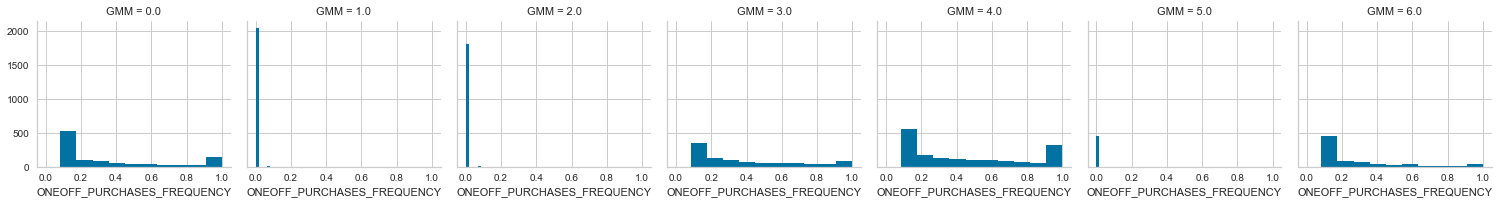

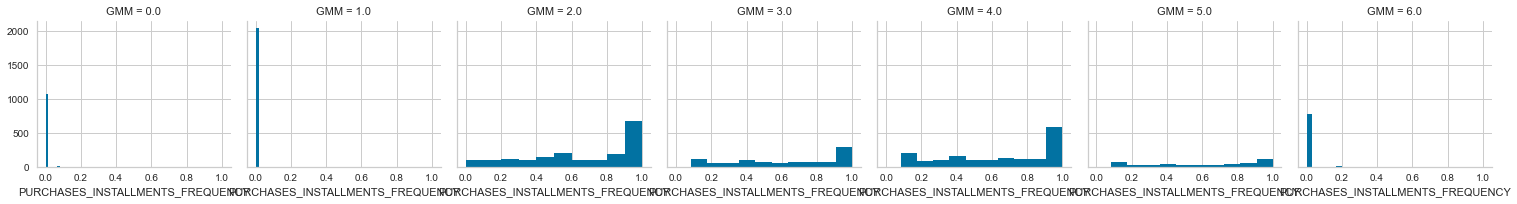

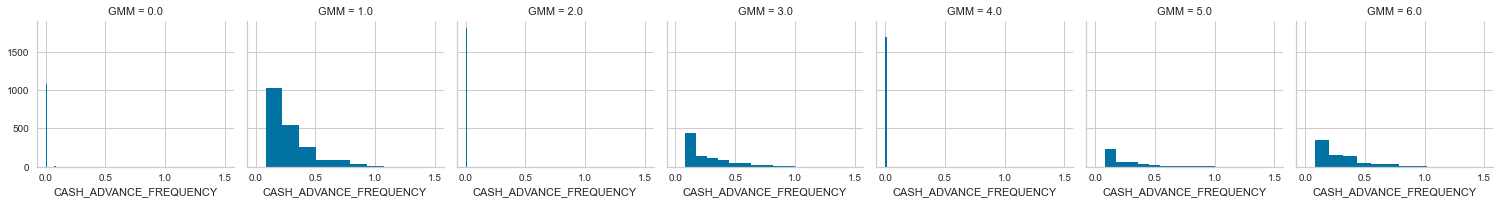

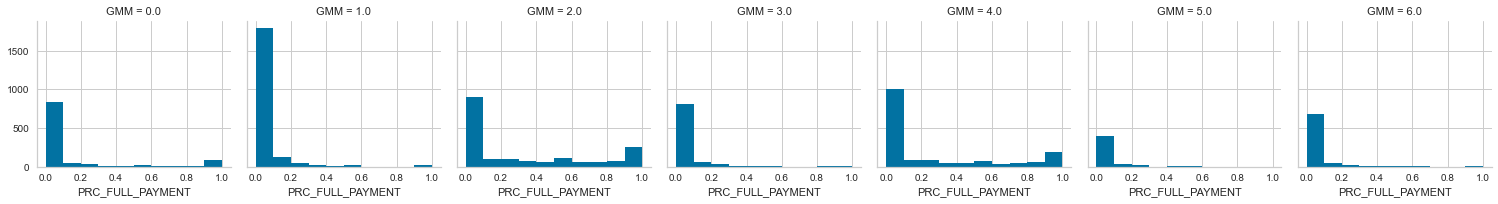

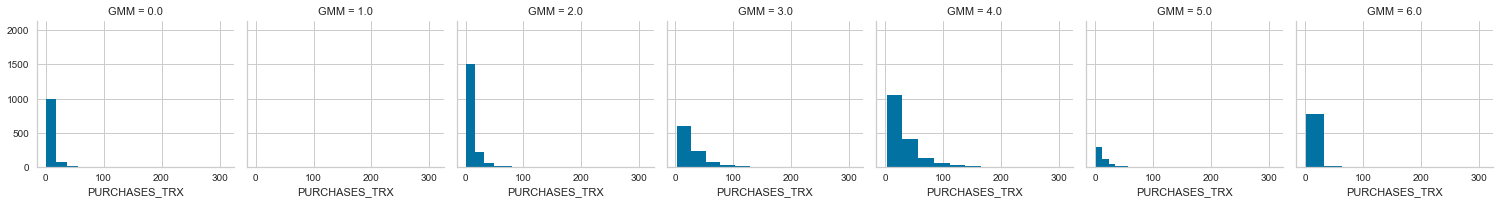

In [62]:
for c in cluster_results[['ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT','PURCHASES_TRX']]:
    grid= sns.FacetGrid(cluster_results, col='GMM')
    grid.map(plt.hist, c)

In [63]:
print(cluster_results['PROFIT'].loc[cluster_results['GMM']==0].sum())
print(cluster_results['PROFIT'].loc[cluster_results['GMM']==1].sum())
print(cluster_results['PROFIT'].loc[cluster_results['GMM']==2].sum())
print(cluster_results['PROFIT'].loc[cluster_results['GMM']==3].sum())
print(cluster_results['PROFIT'].loc[cluster_results['GMM']==4].sum())
print(cluster_results['PROFIT'].loc[cluster_results['GMM']==5].sum())
print(cluster_results['PROFIT'].loc[cluster_results['GMM']==6].sum())

316071.25261599995
3381864.144623
385453.494991
814026.835506
-276002.851593
642650.656833
927983.384336


<blockquote style="color: #000000;">

**Cluster 00 - Cannot Lose Them** 
- São clientes que <mark>utilizam o cartão de crédito com baixa frequencia</mark>
- São clientes que utilizam a modalidade <mark>"a vista"</mark> com <mark>alta frequencia</mark>
- São clientes que utilizam a modalidade <mark>"parcelado"</mark> com <mark>baixissima frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>baixissima frequencia</mark> 
- São clientes que possuem <mark>moderada taxa de pagamento</mark>  com relação ao valor integral do cartão de crédito

    
Numero de Clientes: 1086    
Lucro Total: 316071.25
Lucro Médio: 291.04     
*Rating: 3.5*

***

**Cluster 01 - Hinernating** 
- São clientes que <mark>utilizam o cartão de crédito com baixissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"a vista"</mark> com <mark>baixissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"parcelado"</mark> com <mark>baixissima frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>alta frequencia</mark>
- São clientes que possuem <mark>baixa taxa de pagamento</mark> com relação ao valor integral do cartão de crédito

Rating: 1.0

***

**Cluster 02 - Champions** 
- São clientes que <mark>utilizam o cartão de crédito com alta frequencia</mark>
- São clientes que utilizam a modalidade <mark>"a vista"</mark> com <mark>baixissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"parcelado"</mark> com <mark>altissima frequencia</mark> 
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>baixissima frequencia</mark>
- São clientes que possuem <mark>alta taxa de pagamento</mark> com relação ao valor integral do cartão de crédito

Rating: 5.0

***

**Cluster 03 - Trouble Costumer** 
- São clientes que <mark>utilizam o cartão de crédito com baixa frequencia</mark>
- São clientes que utilizam a modalidade <mark>"a vista"</mark> com <mark>moderada frequencia</mark>
- São clientes que utilizam a modalidade <mark>"parcelado"</mark> com <mark>baixissima frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>alta frequencia</mark>
- São clientes que possuem <mark>baixa taxa de pagamento</mark> com relação ao valor integral do cartão de crédito

Rating: 2.5

***

**Cluster 04 - Endividados** 
- São clientes que <mark>utilizam o cartão de crédito com altissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"a vista"</mark> com <mark>alta frequencia</mark>
- São clientes que utilizam a modalidade <mark>"parcelado"</mark> com <mark>moderada frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>baixissima frequencia</mark>
- São clientes que possuem <mark>alta taxa de pagamento</mark> com relação ao valor integral do cartão de crédito

Numero de Clientes: 1697    
Lucro Total: -$276002.85
Lucro Médio: -$162.64 
Rating: 4.5
    
***

**Cluster 05 - Need Attention** 
- São clientes que <mark>utilizam o cartão de crédito com moderada frequencia</mark>
- São clientes que utilizam a modalidade <mark>"a vista"</mark> com <mark>baixissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"parcelado"</mark> com <mark>alta frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>alta frequencia</mark>
- São clientes que possuem <mark>baixa taxa de pagamento</mark> com relação ao valor integral do cartão de crédito

Rating: 3.0

***

**Cluster 06**
- São clientes que <mark>utilizam o cartão de crédito com altissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"a vista"</mark> com <mark>alta frequencia</mark>
- São clientes que utilizam a modalidade <mark>"parcelado"</mark> com <mark>moderada frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>alta frequencia</mark>
- São clientes que possuem <mark>baixa taxa de pagamento</mark> com relação ao valor integral do cartão de crédito


Rating: 3.0
    
</blockquote>    

C:\Users\Alysson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Alysson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Alysson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

70.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Alysson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Alysson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Alysson\anaconda3\lib\

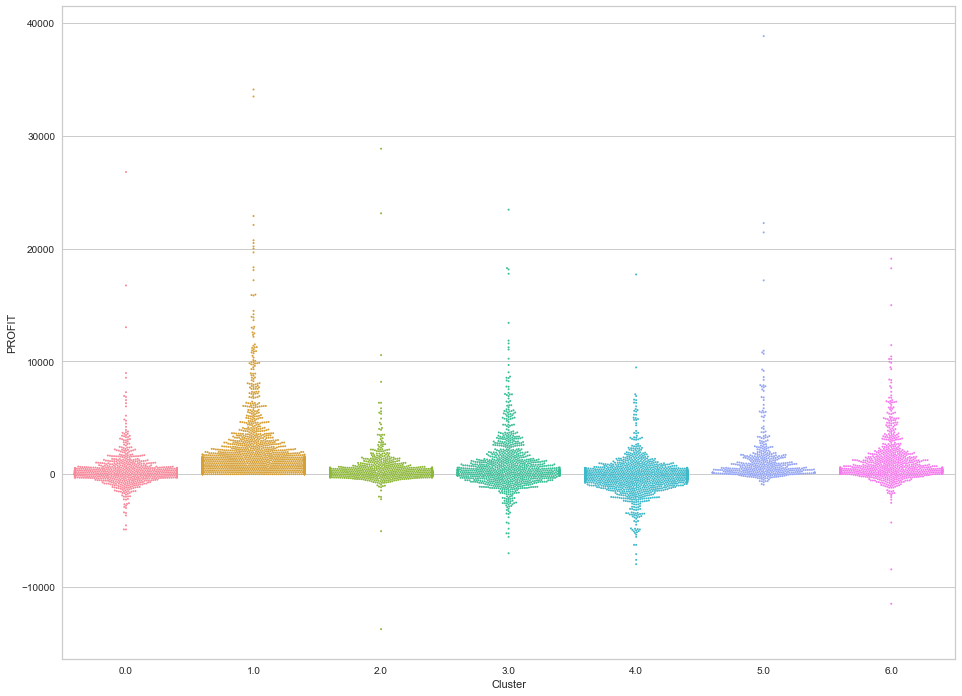

In [64]:
plt.figure(figsize=(16,12))
sns.swarmplot(data=cluster_results, x="GMM", y="PROFIT", size=2)
plt.xlabel('Cluster');

<AxesSubplot:xlabel='GMM', ylabel='PROFIT'>

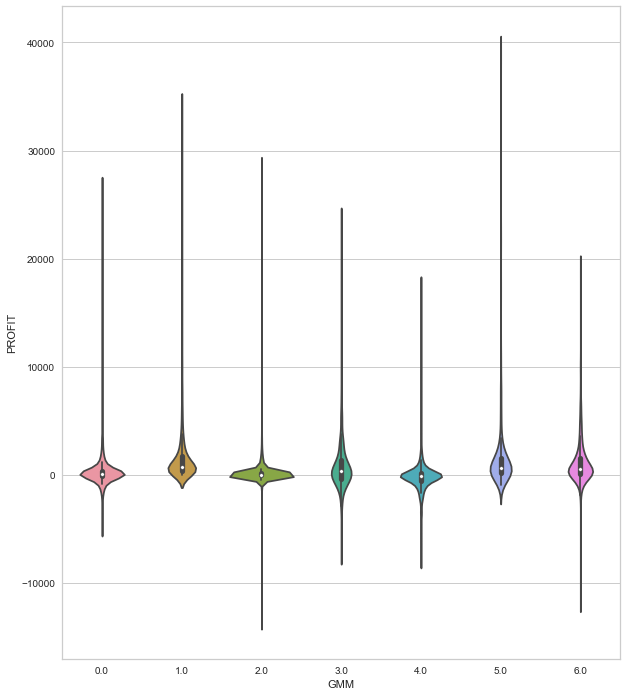

In [65]:
plt.figure(figsize=(10,12))
sns.violinplot(data=cluster_results, x="GMM", y="PROFIT")